In [1]:
                                ###  GOOGLE STOCK LOW-PRICE PREDICTION FOR 2017 ###

In [2]:
# Importing libraries

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn
import tensorflow
import keras
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout
from keras.callbacks import ModelCheckpoint

Using TensorFlow backend.


In [3]:
### Data preprocessing 

# Importing the training set
dataset_train = pd.read_csv('H://stock_price//Google.csv')
training_set = dataset_train.iloc[:, 3:4].values
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

# Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1],1))


In [6]:
### Training the LSTM 

# Initialising the RNN
regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
#regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))

# loading weights
regressor.load_weights("H://stock_price//Weights//Google//google_low_price_weights.98-0.00.hdf5")

# Compiling the RNN
#regressor.compile(optimizer = 'adam', loss = 'mean_squared_error',metrics=['accuracy'])
# Saving Weights
#path="H://stock_price//Weights//Google//google_low_price_weights.{epoch:02d}-{loss:.2f}.hdf5"
#mcp=ModelCheckpoint(path,monitor='loss',save_best_only=True,verbose=0)
# Fitting the RNN to the Training set
#regressor.fit(X_train, y_train, epochs = 100, batch_size = 32,callbacks=[mcp])

In [7]:
### Making the predictions 

# Getting the real stock price of 2017
dataset_test = pd.read_csv('I://3//DeepLearning//Datasets-NN//Recurrent_Neural_Networks-1//Recurrent_Neural_Networks//Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 3:4].values

# Getting the predicted stock price of 2017
dataset_total = pd.concat((dataset_train['Low'], dataset_test['Low']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)



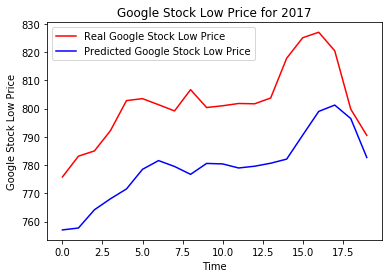

In [8]:
### visualising the results 


plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Low Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Low Price')
plt.title('Google Stock Low Price for 2017')
plt.xlabel('Time')
plt.ylabel('Google Stock Low Price')
plt.legend()
plt.savefig("H://stock_price//Graphs//Google_low_price.png")
plt.show()


In [ ]:
                                    ###   CONGRATULATIONS  ###